In [38]:
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser

import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import pickle
import datetime as dt

import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

import cv2

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input, decode_predictions

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding


from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential

from keras.optimizers import RMSprop
from keras import optimizers

from keras.callbacks import ReduceLROnPlateau
from mpl_toolkits.axes_grid1 import ImageGrid



from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3



from keras.applications.vgg16 import preprocess_input, decode_predictions

np.random.seed(2)
sns.set(style='white', context='notebook', palette='deep')

In [7]:
raw_labels = pd.read_csv("data/labels.csv")

In [92]:
labels_only = raw_labels['breed']

labels_set = set(labels_only)

num_labels = len(labels_set)


map_breed = {}


i=0;

for breed in labels_set:
    map_breed[breed] = i
    i+=1
    

label_map={}
for i in range(len(raw_labels['id'])):
    label_map[raw_labels['id'][i]] = map_breed[raw_labels['breed'][i]]
    

In [99]:
val_breed = {}
for item in map_breed:
    val_breed[map_breed[item]]=item
    

In [94]:
def show_data(path, IMG_SIZE, num):
    i=0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#             img_array = cv2.imread(os.path.join(path,img))
            plt.imshow(img_array)
            plt.show()
            
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            plt.imshow(new_array)
            plt.show()         
        except Exception as e: 
            pass
        if i>num:
            break
        i+=1


def read_prep_data(path, IMG_SIZE, label_map):
    data=[]
    for img in tqdm(os.listdir(path)):
        try:
#             img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            data.append([new_array, label_map[img[:-4]]])  
        except Exception as e: 
            pass
    return data
        
    
def select_categories(data, num_label):
    X=[]
    Y=[]
    
    random.shuffle(data)
    
    for features,label in training_data:
        if label in range(0, num_label):
            X.append(features)
            Y.append(label)
    return X, Y



In [10]:
def pickle_save(data, path):
    pickle_out = open(path,"wb")
    pickle.dump(data, pickle_out)
    pickle_out.close()
    
def pickle_load(path):
    pickle_in = open(path,"rb")
    return pickle.load(pickle_in)
    

In [11]:
def get_model(IMG_SIZE, num_label):
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_label, activation = "softmax"))
    
    return model

In [12]:
training_path = "data/train"
testing_path = "data/test"
IMG_SIZE = 224
num=10

  0%|          | 0/10222 [00:00<?, ?it/s]

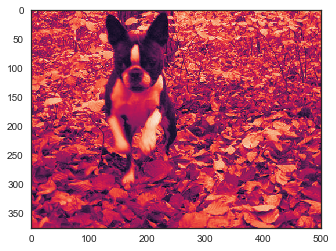

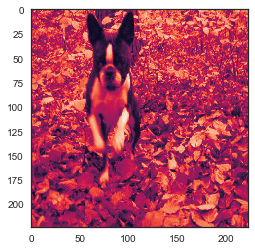

  0%|          | 1/10222 [00:00<1:56:24,  1.46it/s]

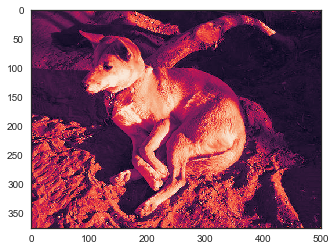

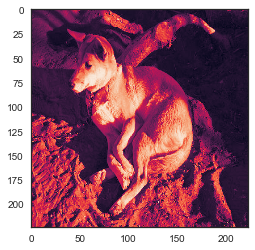

  0%|          | 2/10222 [00:00<1:19:20,  2.15it/s]

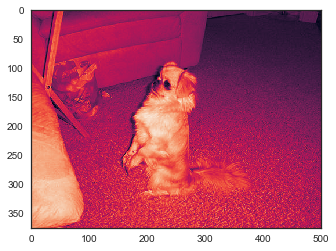

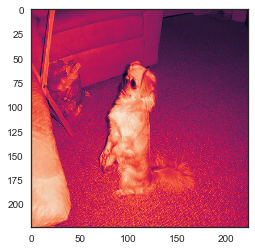

  0%|          | 3/10222 [00:01<1:12:59,  2.33it/s]

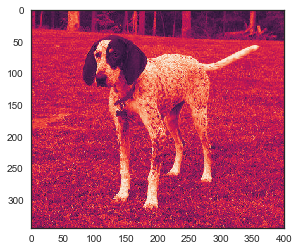

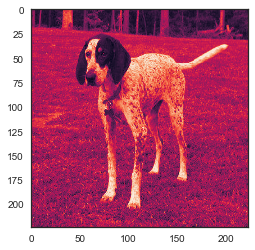

  0%|          | 4/10222 [00:01<1:10:32,  2.41it/s]

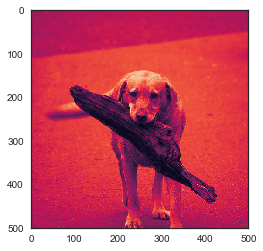

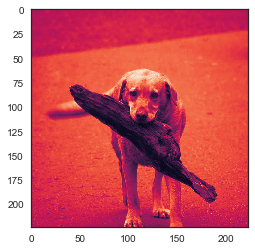

  0%|          | 5/10222 [00:01<1:05:12,  2.61it/s]

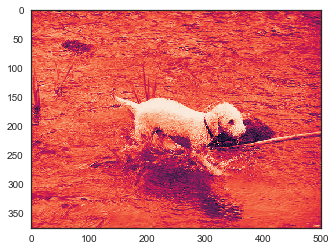

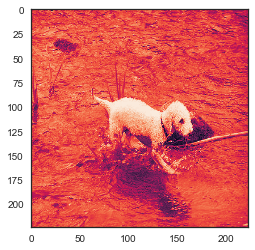

  0%|          | 6/10222 [00:02<1:01:45,  2.76it/s]

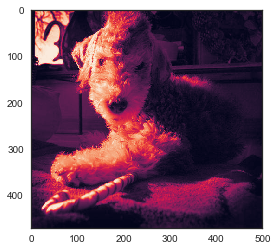

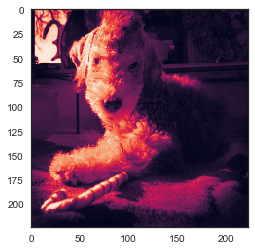

  0%|          | 7/10222 [00:02<59:44,  2.85it/s]  

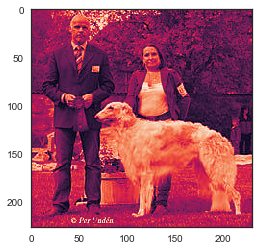

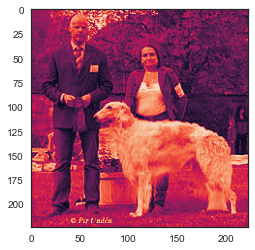

  0%|          | 8/10222 [00:02<58:57,  2.89it/s]

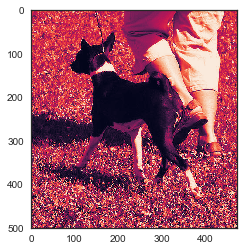

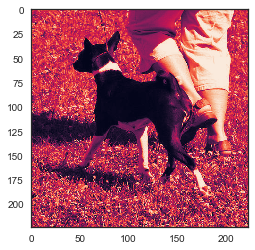

  0%|          | 9/10222 [00:03<56:51,  2.99it/s]

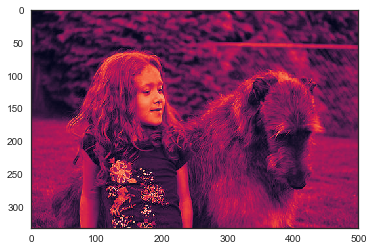

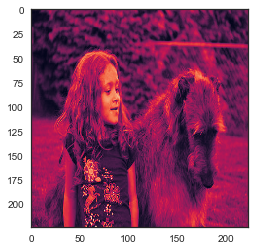

  0%|          | 10/10222 [00:03<56:35,  3.01it/s]

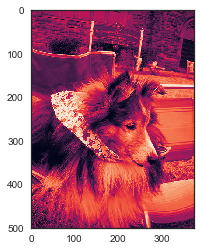

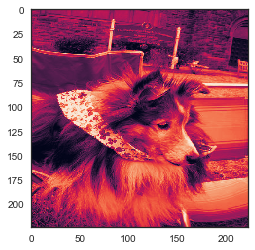

  0%|          | 11/10222 [00:03<55:46,  3.05it/s]

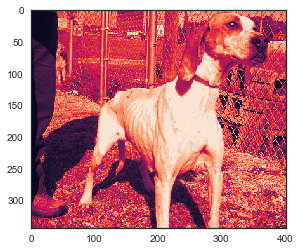

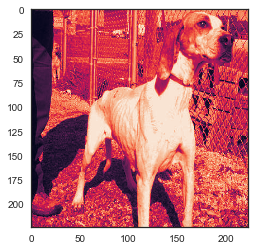

In [13]:
show_data(training_path, IMG_SIZE, num)

  0%|          | 0/10357 [00:00<?, ?it/s]

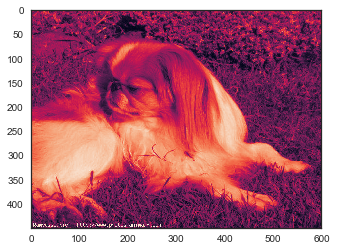

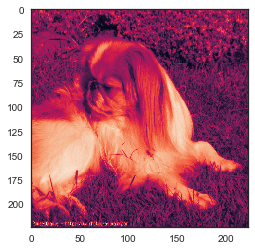

  0%|          | 1/10357 [00:00<50:52,  3.39it/s]

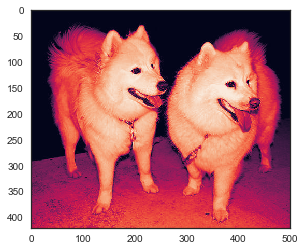

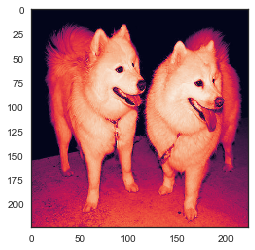

  0%|          | 2/10357 [00:00<47:50,  3.61it/s]

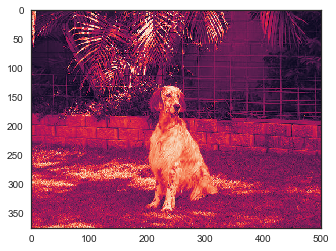

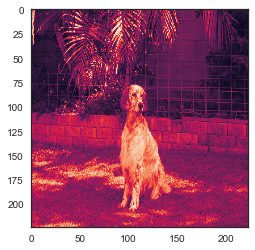

  0%|          | 3/10357 [00:00<49:03,  3.52it/s]

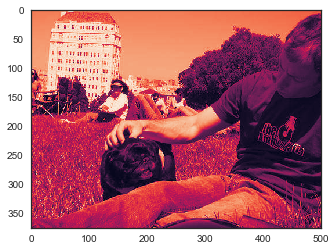

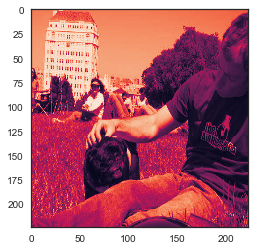

  0%|          | 4/10357 [00:01<48:27,  3.56it/s]

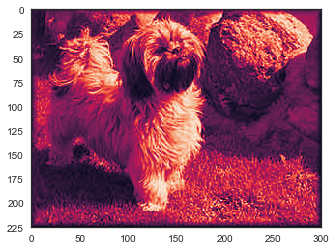

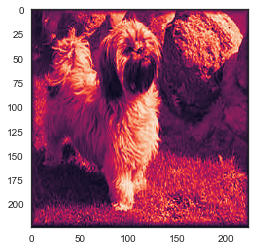

  0%|          | 5/10357 [00:01<48:41,  3.54it/s]

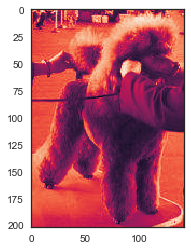

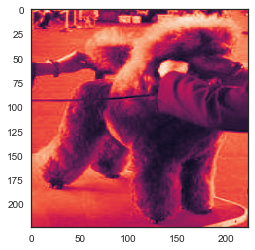

  0%|          | 6/10357 [00:01<47:31,  3.63it/s]

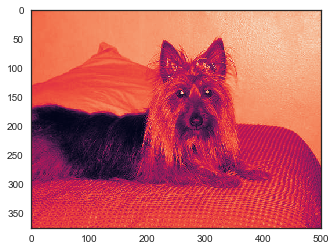

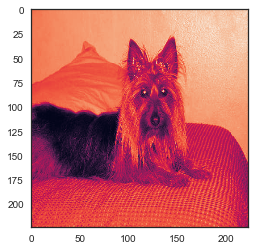

  0%|          | 7/10357 [00:01<48:04,  3.59it/s]

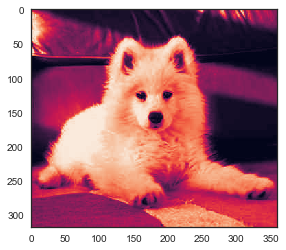

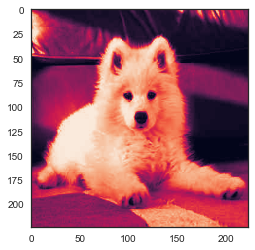

  0%|          | 8/10357 [00:02<47:30,  3.63it/s]

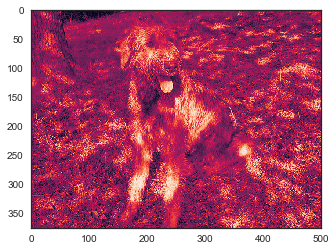

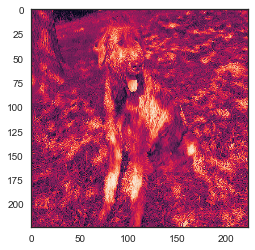

  0%|          | 9/10357 [00:02<47:18,  3.65it/s]

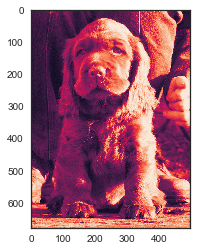

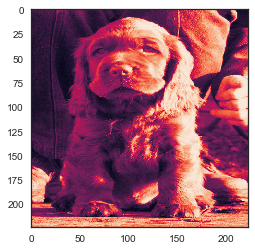

  0%|          | 10/10357 [00:02<46:38,  3.70it/s]

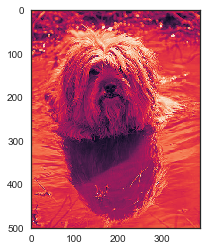

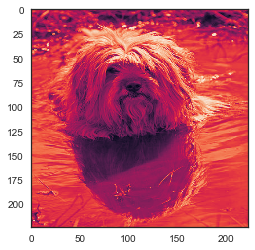

  0%|          | 11/10357 [00:03<47:16,  3.65it/s]

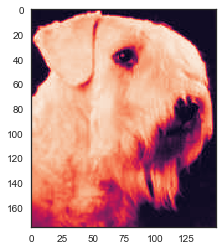

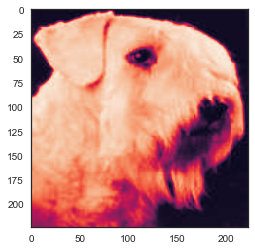

In [14]:
show_data(testing_path, IMG_SIZE, num)

In [15]:
training_data = read_prep_data(training_path, IMG_SIZE, label_map)
testing_data = read_prep_data(testing_path, IMG_SIZE, label_map)

print(len(training_data))
print(len(testing_data))

100%|██████████| 10357/10357 [01:47<00:00, 96.07it/s]


10222
0


In [18]:
num_label = num_labels
num_label = 2

In [19]:
training_data_file = "data/pickle/training_data"
testing_data_file = "data/pickle/testing_data"

In [20]:
# pickle_save(training_data, training_data_file)
# pickle_save(testing_data, testing_data_file)

In [21]:
# training_data = pickle_load(training_data_file)
# testing_data = pickle_load(testing_data_file)

In [22]:
X_train, Y_train = select_categories(training_data, num_label)
X_test, Y_test = select_categories(testing_data, num_label)
 
# print(set(Y_train))
print(len(Y_train))

# print(set(Y_test))
print(len(Y_test))

181
181


In [137]:
Y_train = to_categorical(Y_train, num_classes = num_label)
Y_test = to_categorical(Y_test, num_classes = num_label)

IndexError: index 18 is out of bounds for axis 1 with size 2

In [23]:
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [15]:
directory = "data/"
X_train_path_p, Y_train_path_p, X_test_path_p, Y_test_path_p = "X_train", "Y_train", "X_test", "Y_test"

In [16]:
pickle_save(X_train, directory+X_train_path_p)
pickle_save(Y_train, directory+Y_train_path_p)
pickle_save(X_test, directory+X_test_path_p)
pickle_save(Y_test, directory+Y_test_path_p)

In [17]:
X_train = pickle_load(directory+X_train_path_p)
Y_train = pickle_load(directory+Y_train_path_p)
X_test = pickle_load(directory+X_test_path_p)
Y_test = pickle_load(directory+Y_test_path_p)

In [18]:
norm = 255.0
X_train, X_test = X_train/norm, X_test/norm

In [19]:
# Define the optimizer
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [20]:
model = get_model(IMG_SIZE, num_label)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [21]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.001)

In [22]:
epochs = 100 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 32

In [23]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [24]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/100
 - 53s - loss: 3.2622 - acc: 0.2074 - val_loss: 1.6048 - val_acc: 0.2367
Epoch 2/100
 - 49s - loss: 1.6069 - acc: 0.2579 - val_loss: 1.6028 - val_acc: 0.2367
Epoch 3/100
 - 48s - loss: 1.6066 - acc: 0.2444 - val_loss: 1.6021 - val_acc: 0.2367
Epoch 4/100
 - 48s - loss: 1.6017 - acc: 0.2455 - val_loss: 1.6013 - val_acc: 0.2367

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 5/100
 - 49s - loss: 1.6011 - acc: 0.2344 - val_loss: 1.6002 - val_acc: 0.2367
Epoch 6/100
 - 45s - loss: 1.6020 - acc: 0.2365 - val_loss: 1.6003 - val_acc: 0.2367
Epoch 7/100
 - 49s - loss: 1.5967 - acc: 0.2522 - val_loss: 1.6000 - val_acc: 0.2367

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 8/100
 - 45s - loss: 1.6117 - acc: 0.2320 - val_loss: 1.6003 - val_acc: 0.2367
Epoch 9/100
 - 49s - loss: 1.5990 - acc: 0.2623 - val_loss: 1.6004 - val_acc: 0.2367
Epoch 10/100
 - 56s - loss: 1.6060 - acc: 0.2277 - val_loss: 1.6003 - val_

KeyboardInterrupt: 

In [27]:
start = dt.datetime.now()

In [30]:
cache_dir = expanduser(join('~', '.keras'))
if not exists(cache_dir):
    makedirs(cache_dir)
models_dir = join(cache_dir, 'models')
if not exists(models_dir):
    makedirs(models_dir)

In [38]:
def read_img(img_id, train_or_test, size):
    """Read and resize image.
    # Arguments
        img_id: string
        train_or_test: string 'train' or 'test'.
        size: resize the original image.
    # Returns
        Image as numpy array.
    """
    img = image.load_img(join(data_dir, train_or_test, '%s.jpg' % img_id), target_size=size)
    img = image.img_to_array(img)
    return img

In [24]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [26]:
from sklearn.metrics import accuracy_score

preds = resnet_model.predict(X_train)
    


In [109]:
def show_pred(preds, index, seq, ran, Y):
    leng = len(preds)
    if seq:
        for i in range(index):
            if ran:
                index = random.randint(0, leng) 
            _, imagenet_class_name, prob = decode_predictions(preds, top=1)[index][0]
            plt.title("Original: " + val_breed[Y[index]] + "\nPrediction: " + imagenet_class_name)
            plt.imshow(X_train[index])
            plt.show()
    else:
            _, imagenet_class_name, prob = decode_predictions(preds, top=1)[index][0]
            plt.title("Original: " + val_breed[Y[index]] + "\nPrediction: " + imagenet_class_name)
            plt.imshow(X_train[index])
            plt.show()
        

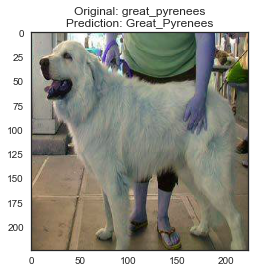

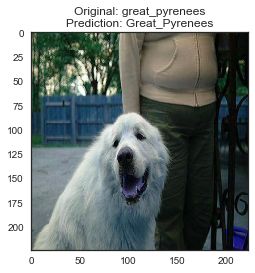

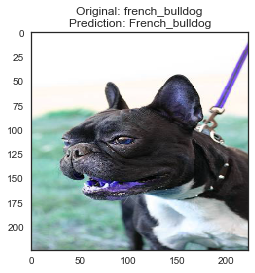

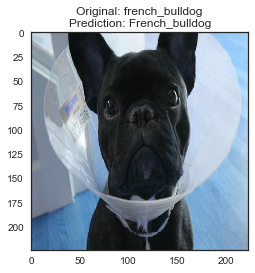

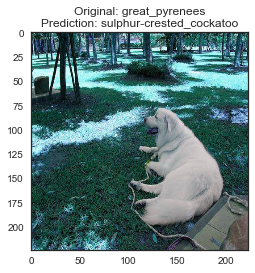

In [110]:
show_pred(preds, 5, True, True, Y_train)

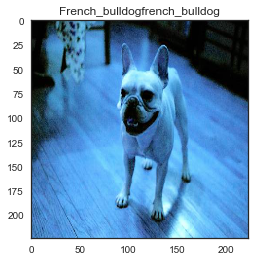

In [100]:
 _, imagenet_class_name, prob = decode_predictions(preds, top=1)[0][0]
plt.title(imagenet_class_name+ str(val_breed[Y_train[0]]))
plt.imshow(X_train[0])
plt.show()

In [98]:
val_breed

{'great_pyrenees': 'great_pyrenees',
 'french_bulldog': 'french_bulldog',
 'affenpinscher': 'affenpinscher',
 'kerry_blue_terrier': 'kerry_blue_terrier',
 'basenji': 'basenji',
 'boston_bull': 'boston_bull',
 'malinois': 'malinois',
 'groenendael': 'groenendael',
 'keeshond': 'keeshond',
 'labrador_retriever': 'labrador_retriever',
 'maltese_dog': 'maltese_dog',
 'dhole': 'dhole',
 'doberman': 'doberman',
 'giant_schnauzer': 'giant_schnauzer',
 'tibetan_mastiff': 'tibetan_mastiff',
 'scottish_deerhound': 'scottish_deerhound',
 'bedlington_terrier': 'bedlington_terrier',
 'shih-tzu': 'shih-tzu',
 'norfolk_terrier': 'norfolk_terrier',
 'bull_mastiff': 'bull_mastiff',
 'american_staffordshire_terrier': 'american_staffordshire_terrier',
 'basset': 'basset',
 'bernese_mountain_dog': 'bernese_mountain_dog',
 'toy_terrier': 'toy_terrier',
 'lakeland_terrier': 'lakeland_terrier',
 'walker_hound': 'walker_hound',
 'papillon': 'papillon',
 'staffordshire_bullterrier': 'staffordshire_bullterrier'

French_bulldog
a


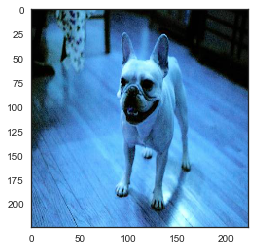

a


In [59]:
_, imagenet_class_name, prob = decode_predictions(preds, top=1)[0][0]
print(imagenet_class_name)
plt.imshow(X_train[0])

print("a")
plt.show()
print("a")